In [202]:
import csv
import pandas as pd
import numpy as np

In [203]:
with open('Nifty 50 data.csv','r') as csvfile:
    reader = csv.DictReader(csvfile)
    print(reader.fieldnames)         #Getting the Columns in dataset

['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (Rs. Cr)']


In [204]:
df = pd.read_csv('Nifty 50 data.csv')
df.head()                           #retrieving first 5 rows

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,07-Jan-19,10804.85,10835.95,10750.15,10771.80,269371080,12731.29
1,08-Jan-19,10786.25,10818.45,10733.25,10802.15,277697672,13433.48
2,09-Jan-19,10862.40,10870.40,10749.40,10855.15,333010535,16213.30
3,10-Jan-19,10859.35,10859.35,10801.80,10821.60,254365477,12031.26
4,11-Jan-19,10834.75,10850.15,10739.40,10794.95,260792200,13084.60


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               867 non-null    object 
 1   Open               867 non-null    float64
 2   High               867 non-null    float64
 3   Low                867 non-null    float64
 4   Close              867 non-null    float64
 5   Shares Traded      867 non-null    int64  
 6   Turnover (Rs. Cr)  867 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 47.5+ KB


In [206]:
# Making newDate column by converting datestring for further comparision of dates

from datetime import datetime
newDate= []
for row in df.index :
    newDate.append(datetime.strptime(df['Date'].loc[row], "%d-%b-%y"))
df['newDate'] = newDate
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),newDate
0,07-Jan-19,10804.85,10835.95,10750.15,10771.80,269371080,12731.29,2019-01-07
1,08-Jan-19,10786.25,10818.45,10733.25,10802.15,277697672,13433.48,2019-01-08
2,09-Jan-19,10862.40,10870.40,10749.40,10855.15,333010535,16213.30,2019-01-09
3,10-Jan-19,10859.35,10859.35,10801.80,10821.60,254365477,12031.26,2019-01-10
4,11-Jan-19,10834.75,10850.15,10739.40,10794.95,260792200,13084.60,2019-01-11
...,...,...,...,...,...,...,...,...
862,27-Jul-22,16475.35,16653.45,16438.75,16641.80,185210970,17608.03,2022-07-27
863,28-Jul-22,16774.85,16947.65,16746.25,16929.60,376256315,26674.28,2022-07-28
864,29-Jul-22,17079.50,17172.80,17018.15,17158.25,436059722,28241.29,2022-07-29
865,01-Aug-22,17243.20,17356.25,17154.80,17340.05,381532671,23221.04,2022-08-01


In [207]:
# Assigning Period (Pre_Covid, Covid, Post_Covid) based on the newDate stamp

def period(x) :
    d1 = datetime(2019, 1, 7)
    d2 = datetime(2020, 1, 31)
    d3 = datetime(2021, 4, 30)
    if x >= d1 and x <= d2 :
        return "Pre_Covid"
    if x > d2 and x <= d3 :
        return "Covid"
    if x > d3:
        return "Post_Covid"
    else :
        return ""
Period = []
for row in df.index : 
    Period.append(period(df['newDate'].loc[row]))
df['Period'] = Period
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),newDate,Period
0,07-Jan-19,10804.85,10835.95,10750.15,10771.80,269371080,12731.29,2019-01-07,Pre_Covid
1,08-Jan-19,10786.25,10818.45,10733.25,10802.15,277697672,13433.48,2019-01-08,Pre_Covid
2,09-Jan-19,10862.40,10870.40,10749.40,10855.15,333010535,16213.30,2019-01-09,Pre_Covid
3,10-Jan-19,10859.35,10859.35,10801.80,10821.60,254365477,12031.26,2019-01-10,Pre_Covid
4,11-Jan-19,10834.75,10850.15,10739.40,10794.95,260792200,13084.60,2019-01-11,Pre_Covid
...,...,...,...,...,...,...,...,...,...
862,27-Jul-22,16475.35,16653.45,16438.75,16641.80,185210970,17608.03,2022-07-27,Post_Covid
863,28-Jul-22,16774.85,16947.65,16746.25,16929.60,376256315,26674.28,2022-07-28,Post_Covid
864,29-Jul-22,17079.50,17172.80,17018.15,17158.25,436059722,28241.29,2022-07-29,Post_Covid
865,01-Aug-22,17243.20,17356.25,17154.80,17340.05,381532671,23221.04,2022-08-01,Post_Covid


# Daily Return% = (Closing - Prev_Closing)*100 / Prev_Closing

In [208]:
# Calculating Daily Return % using prev day and current day closing

def returnf(x,y):
    return ((x-y)*100/y)
for i in df.index :
    if i == 0:
        df['DailyReturn%'] = (df['Close'].loc[i] - 10626)*100/10626                  #last day closing of first index is 10626/-
    else :
        df['DailyReturn%'].loc[i] = returnf(df['Close'].loc[i],df['Close'].loc[i-1])
df

C:\Users\harsh\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),newDate,Period,DailyReturn%
0,07-Jan-19,10804.85,10835.95,10750.15,10771.80,269371080,12731.29,2019-01-07,Pre_Covid,1.372106
1,08-Jan-19,10786.25,10818.45,10733.25,10802.15,277697672,13433.48,2019-01-08,Pre_Covid,0.281754
2,09-Jan-19,10862.40,10870.40,10749.40,10855.15,333010535,16213.30,2019-01-09,Pre_Covid,0.490643
3,10-Jan-19,10859.35,10859.35,10801.80,10821.60,254365477,12031.26,2019-01-10,Pre_Covid,-0.309070
4,11-Jan-19,10834.75,10850.15,10739.40,10794.95,260792200,13084.60,2019-01-11,Pre_Covid,-0.246267
...,...,...,...,...,...,...,...,...,...,...
862,27-Jul-22,16475.35,16653.45,16438.75,16641.80,185210970,17608.03,2022-07-27,Post_Covid,0.958211
863,28-Jul-22,16774.85,16947.65,16746.25,16929.60,376256315,26674.28,2022-07-28,Post_Covid,1.729380
864,29-Jul-22,17079.50,17172.80,17018.15,17158.25,436059722,28241.29,2022-07-29,Post_Covid,1.350593
865,01-Aug-22,17243.20,17356.25,17154.80,17340.05,381532671,23221.04,2022-08-01,Post_Covid,1.059549


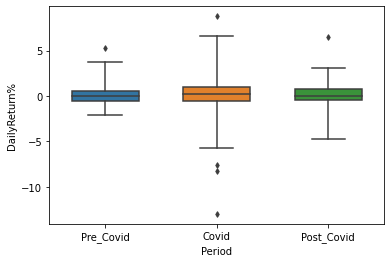

In [216]:
import seaborn as sns
sns.boxplot(data = df,x='Period',y='DailyReturn%',width =0.6,fliersize=4,whis=4.5);

# Liquidity  = log10 ( Closing Price * Shares Traded / (High - Low))

In [217]:
# Calculating Liquidity based on the above formula

import math
def Liquidityf(H,L,C,sT):
    return math.log((C*sT/(H-L)),10)
liquidity = []
for row in df.index:
    liquidity.append(Liquidityf(df['High'].loc[row],df['Low'].loc[row],df['Close'].loc[row],df['Shares Traded'].loc[row]))
df['Liquidity'] = liquidity
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),newDate,Period,DailyReturn%,Liquidity
0,07-Jan-19,10804.85,10835.95,10750.15,10771.80,269371080,12731.29,2019-01-07,Pre_Covid,1.372106,10.529152
1,08-Jan-19,10786.25,10818.45,10733.25,10802.15,277697672,13433.48,2019-01-08,Pre_Covid,0.281754,10.546643
2,09-Jan-19,10862.40,10870.40,10749.40,10855.15,333010535,16213.30,2019-01-09,Pre_Covid,0.490643,10.475308
3,10-Jan-19,10859.35,10859.35,10801.80,10821.60,254365477,12031.26,2019-01-10,Pre_Covid,-0.309070,10.679704
4,11-Jan-19,10834.75,10850.15,10739.40,10794.95,260792200,13084.60,2019-01-11,Pre_Covid,-0.246267,10.405171
...,...,...,...,...,...,...,...,...,...,...,...
862,27-Jul-22,16475.35,16653.45,16438.75,16641.80,185210970,17608.03,2022-07-27,Post_Covid,0.958211,10.157035
863,28-Jul-22,16774.85,16947.65,16746.25,16929.60,376256315,26674.28,2022-07-28,Post_Covid,1.729380,10.500071
864,29-Jul-22,17079.50,17172.80,17018.15,17158.25,436059722,28241.29,2022-07-29,Post_Covid,1.350593,10.684669
865,01-Aug-22,17243.20,17356.25,17154.80,17340.05,381532671,23221.04,2022-08-01,Post_Covid,1.059549,10.516415


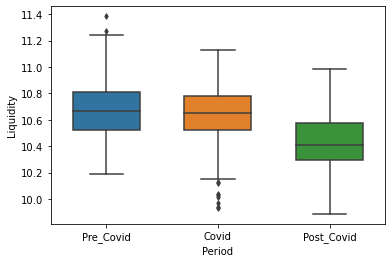

In [219]:
sns.boxplot(data = df,x='Period',y='Liquidity',width =0.6,fliersize=4);

# Volatility = Monthly Std Deviation of Daily Returns %

In [212]:
#Getting Monthly Volatility
import statistics
newDF = df.groupby(['Period',df.newDate.dt.year,df.newDate.dt.month])['DailyReturn%'].std()
newDF=pd.DataFrame(newDF)
newDF
#np.array(newDF['DailyReturn%'].loc['Covid'])

DailyReturn%
Period     newDate newDate              
Covid      2020    2            1.332447
                   3            4.961194
                   4            2.980058
                   5            2.079035
                   6            1.247734
                   7            0.947879
                   8            0.946091
                   9            1.192958
                   10           0.961570
                   11           0.862852
                   12           0.888759
           2021    1            1.024376
                   2            1.706106
                   3            1.254921
                   4            1.319929
Post_Covid 2021    6            1.433531
                   7            0.568059
                   8            0.572950
                   9            0.605500
                   10           0.823025
                   11           1.014279
                   12           1.067480
           2022    1            1.061848
                   2            1.780735
                   3            1.245771
                   4            1.198192
                   5            1.456540
                   6            1.068259
                   7            0.775622
                   8            0.727193
Pre_Covid  2019    1            0.743821
                   2            0.623699
                   3            0.629776
                   4            0.681042
                   5            1.137330
                   6            0.768046
                   7            0.734019
                   8            1.065789
                   9            1.673479
                   10           0.764020
                   11           0.530620
                   12           0.560989
           2020    1            0.761276

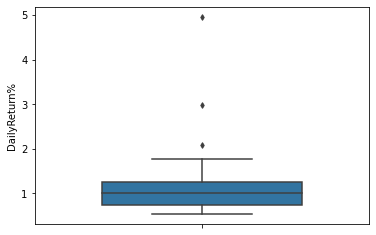

In [215]:
sns.boxplot(data = newDF,y='DailyReturn%',width =0.6,fliersize=4);

In [214]:
df.corr()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),DailyReturn%,Liquidity
Open,1.000000,0.999525,0.999394,0.998891,-0.563924,-0.028957,-0.007861,-0.310218
High,0.999525,1.000000,0.999151,0.999481,-0.558781,-0.021719,0.006844,-0.320518
Low,0.999394,0.999151,1.000000,0.999455,-0.571907,-0.037951,0.011494,-0.293304
Close,0.998891,0.999481,0.999455,1.000000,-0.565013,-0.028991,0.027697,-0.305135
Shares Traded,-0.563924,-0.558781,-0.571907,-0.565013,1.000000,0.627357,-0.038008,0.372107
Turnover (Rs. Cr),-0.028957,-0.021719,-0.037951,-0.028991,0.627357,1.000000,0.038486,0.090395
DailyReturn%,-0.007861,0.006844,0.011494,0.027697,-0.038008,0.038486,1.000000,0.127095
Liquidity,-0.310218,-0.320518,-0.293304,-0.305135,0.372107,0.090395,0.127095,1.000000


<AxesSubplot:>

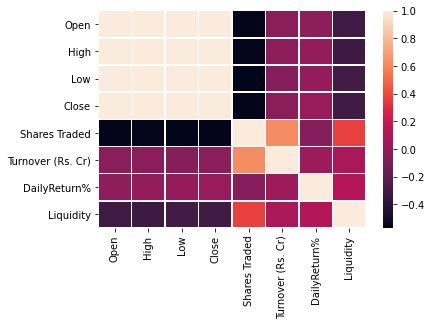

In [189]:
sns.heatmap(df.corr(),cbar = True, linewidths = 0.5)

# Hypothesis testing (t test and Interpretation)

## Compairing dailyReturns% 

### Pre_Covid v/s Covid

In [106]:
# Null Hypothesis - there is no difference between the means of dailyReturns% for Pre_covid and Covid period
import scipy.stats as stats
_,p_value = stats.ttest_ind(a=df[df['Period']=='Pre_Covid']['DailyReturn%'],b = df[df['Period']=='Covid']['DailyReturn%'],equal_var = False)

In [107]:
p_value #here p>0.1 (>10% error), we cannot reject null hypothesis 

0.7720985240925967

### Covid v/s Post_Covid

In [108]:
# Null Hypothesis - there is no difference between the means of dailyReturns% for Post_Covid and Covid period
_,p_value = stats.ttest_ind(a=df[df['Period']=='Covid']['DailyReturn%'],b = df[df['Period']=='Post_Covid']['DailyReturn%'],equal_var = False)

In [109]:
p_value   #here p>0.1 (>10% error), we cannot reject null hypothesis 

0.8765324186381679

### Post_Covid v/s Pre_Covid

In [125]:
# Null Hypothesis - there is no difference between the means of dailyReturns% for Covid and Pre_Covid period
_,p_value = stats.ttest_ind(a=df[df['Period']=='Post_Covid']['DailyReturn%'],b = df[df['Period']=='Pre_Covid']['DailyReturn%'],equal_var = False)

In [126]:
p_value   #here p>0.1 (>10% error), we cannot reject null hypothesis 

0.8539131706225256

## Compairing Liquidity 

### Pre_Covid v/s Covid

In [112]:
# Null Hypothesis - there is no difference between the means of Liquidity for Pre_covid and Covid period
_,p_value = stats.ttest_ind(a=df[df['Period']=='Covid']['Liquidity'],b = df[df['Period']=='Pre_Covid']['Liquidity'],equal_var = False)

In [113]:
p_value   #here p<0.1 (<10% error), we reject null hypothesis 

0.01084935488426253

### Covid v/s Post_Covid

In [114]:
# Null Hypothesis - there is no difference between the means of Liquidity for Post_Covid and Covid period
_,p_value = stats.ttest_ind(a=df[df['Period']=='Covid']['Liquidity'],b = df[df['Period']=='Post_Covid']['Liquidity'],equal_var = False)

In [115]:
p_value   #here p<0.1 (<10% error), we reject null hypothesis 

1.0347525786916424e-28

### Pre_Covid v/s Post_Covid

In [116]:
# Null Hypothesis - there is no difference between the means of Liquidity for Pre_covid and Post_Covid period
_,p_value = stats.ttest_ind(a=df[df['Period']=='Pre_Covid']['Liquidity'],b = df[df['Period']=='Post_Covid']['Liquidity'],equal_var = False)

In [117]:
p_value   #here p<0.1 (<10% error), we reject null hypothesis 

7.391994579753427e-38

## Compairing Volatility

### Pre_Covid v/s Covid

In [118]:
# Null Hypothesis - there is no difference between the means of Volatility for Pre_covid and Covid period
_,p_value = stats.ttest_ind(a=np.array(newDF['DailyReturn%'].loc['Covid']),b = np.array(newDF['DailyReturn%'].loc['Pre_Covid']),equal_var = False)

In [119]:
p_value    #here p<0.1 (<10% error), we reject null hypothesis 

0.01975661267064806

### Covid v/s Post_Covid

In [120]:
# Null Hypothesis - there is no difference between the means of Volatility for Pre_covid and Covid period
_p,p_value = stats.ttest_ind(a=np.array(newDF['DailyReturn%'].loc['Covid']),b = np.array(newDF['DailyReturn%'].loc['Post_Covid']),equal_var = False)

In [121]:
p_value     #here p<0.1 (<10% error), we reject null hypothesis 

0.07889179894851903

### Pre_Covid v/s Post_Covid

In [122]:
# Null Hypothesis - there is no difference between the means of ### Pre_Covid v/s CovidVolatility for Pre_covid and Covid period
_,p_value = stats.ttest_ind(a=np.array(newDF['DailyReturn%'].loc['Pre_Covid']),b = np.array(newDF['DailyReturn%'].loc['Post_Covid']),equal_var = False)

In [123]:
p_value     #here p>0.1 (>10% error), we cannot reject null hypothesis 

0.115543085552505

## Anova Testing

### DailyReturn%

In [193]:
# Null Hypothesis - there is no difference between the means of DailyReturns% for Pre_Covid, Covid period, Post_Covid Period
_,p_value = stats.f_oneway(df[df['Period']=='Pre_Covid']['DailyReturn%'],df[df['Period']=='Covid']['DailyReturn%'],df[df['Period']=='Post_Covid']['DailyReturn%'])

In [194]:
p_value    #here p>0.1 (>10% error), we cannot reject null hypothesis 

0.9553487983237647

### Liquidity

In [197]:
# Null Hypothesis - there is no difference between the means of Liquidity for Pre_Covid, Covid period, Post_Covid Period
_,p_value = stats.f_oneway(df[df['Period']=='Pre_Covid']['Liquidity'],df[df['Period']=='Covid']['Liquidity'],df[df['Period']=='Post_Covid']['Liquidity'])

In [198]:
p_value    #here p<0.1 (<10% error), we reject null hypothesis 

2.6079432082029862e-43

### Volatility

In [199]:
# Null Hypothesis - there is no difference between the means of Volatility for Pre_Covid, Covid period, Post_Covid Period
_,p_value = stats.f_oneway(np.array(newDF['DailyReturn%'].loc['Covid']),np.array(newDF['DailyReturn%'].loc['Pre_Covid']),np.array(newDF['DailyReturn%'].loc['Post_Covid']))

In [200]:
p_value    #here p<0.1 (<10% error), we reject null hypothesis 

0.01719928010272032